# First image processing and opencv usage

We will use OpenCV (Open Source Computer Vision) python library. OpenCV python's library name last version is cv2. 
OpenCV stores images in BGR (Blue Green Red) format. 

In [18]:
from PIL import Image
import numpy as np
import os 
import cv2 # opencv
import matplotlib.pyplot as plt
from common_params import data_dir
from common_plots import display_color_histogram

In [19]:
first_image = data_dir  + "Images/n02085620-Chihuahua/n02085620_10074.jpg"
os.path.exists(first_image)


True

In [20]:
imgCV = cv2.imread(first_image)

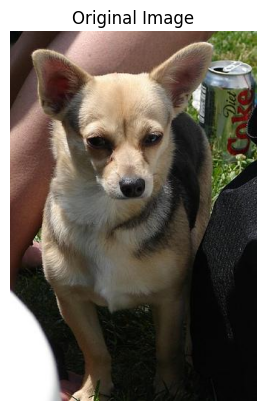

In [21]:
# to avoid grid lines
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imgCV,cv2.IMREAD_ANYCOLOR))
plt.show()

In [22]:
img = Image.open(first_image)

img.show()

In [23]:
# Récupérer et afficher la taille de l'image (en pixels)
dimensions = imgCV.shape
height, width, channels = dimensions
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (500, 333, 3)
Image Height       :  500
Image Width        :  333
Number of Channels :  3


# Mode of image : number of colors that can be display on a image 
- LAB : one channel for lightness from 0 to 100, two colors A (green-red axis) and B (Blue-Yellow axis) from +127 to -128
- RGB : 0 to 255 (3*8bits), Red green blue additive process, used in most electronic devices but colors output  can vary between display 
- CMYK : Cyan Magenta Yellow and Key (black) substractive  
- index
- greyscale  : 0 black to 255 white ex : ('L' for 8-bit )
- bitmap : combines white and black pixels ('1')

In [24]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (99, 75, 73)


Pillow takes the origin of the axis on the top left corner . 

In [25]:


# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
mat

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (500, 333, 3)


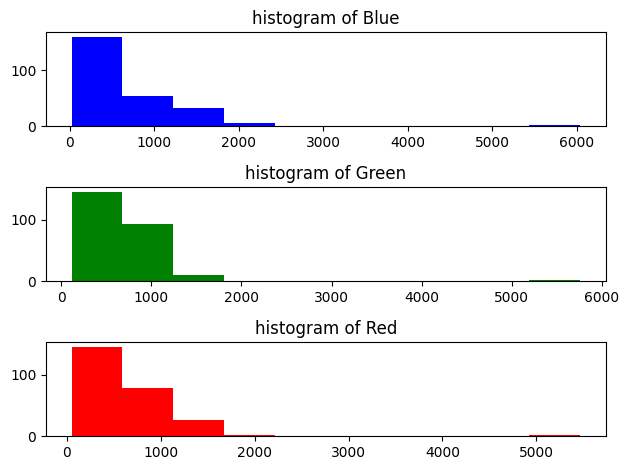

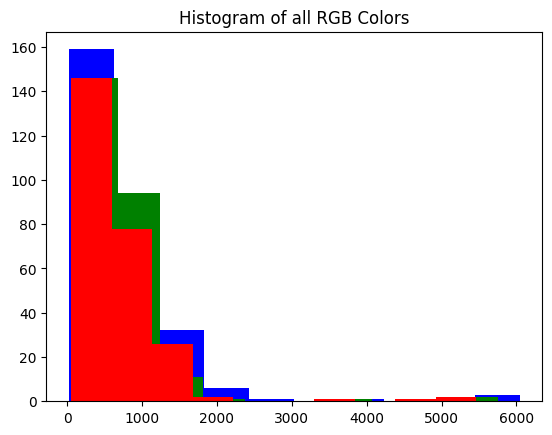

In [26]:
display_color_histogram(imgCV)

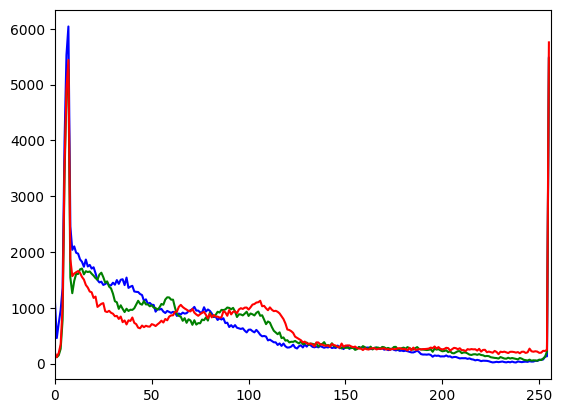

In [42]:

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgCV],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Convert RGB to greyscale 

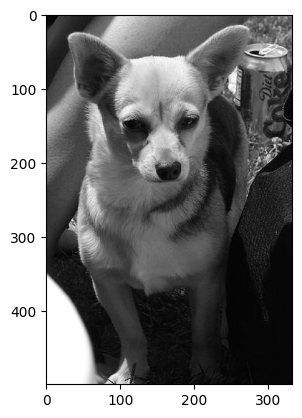

In [27]:
grayImg = cv2.cvtColor(imgCV, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap="gray")
plt.show()

Brightness histogram 
0 : black, 255 white

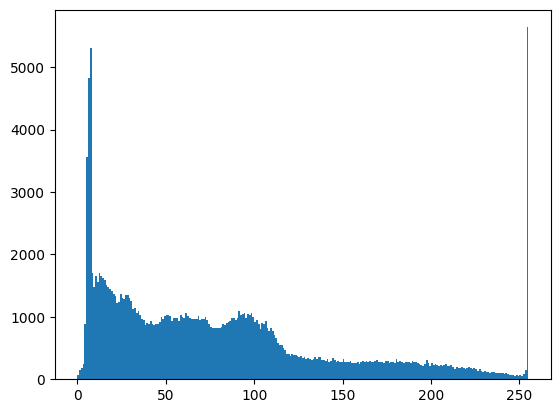

In [28]:
n, bins, patches = plt.hist(grayImg.flatten(), bins=range(256))
plt.show()

### image change

In [29]:
hist = cv2.calcHist([grayImg], [0], None, [256], [0, 256])

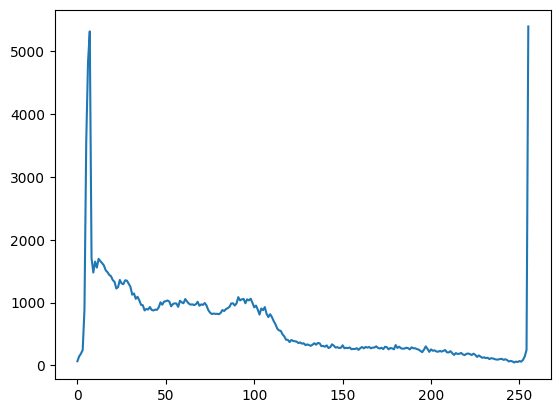

In [31]:
plt.plot(hist)
plt.show()

In [37]:
grayImgEq = cv2.equalizeHist(grayImg)  # equalize 
hist = cv2.calcHist([grayImgEq], [0], None, [256], [0, 256])

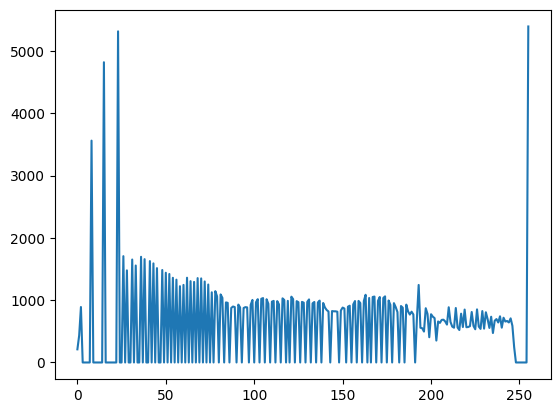

In [38]:
plt.plot(hist)
plt.show()

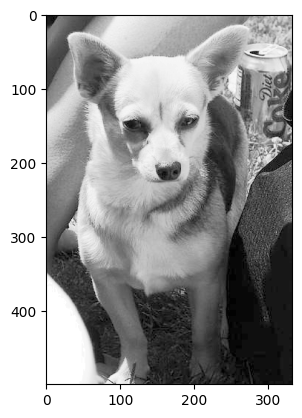

In [40]:
plt.imshow(grayImgEq, cmap="gray")
plt.show()

## Contrast

In [49]:
# define the alpha and beta
beta = 200 # Brightness control

# call convertScaleAbs function
adjusted = cv2.convertScaleAbs(grayImg, beta=beta)

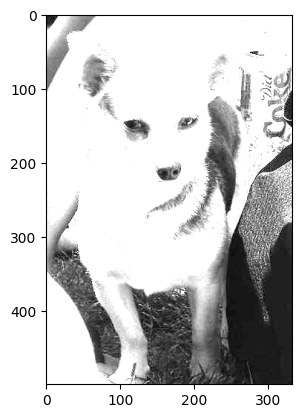

In [50]:
plt.imshow(adjusted, cmap="gray")
plt.show()

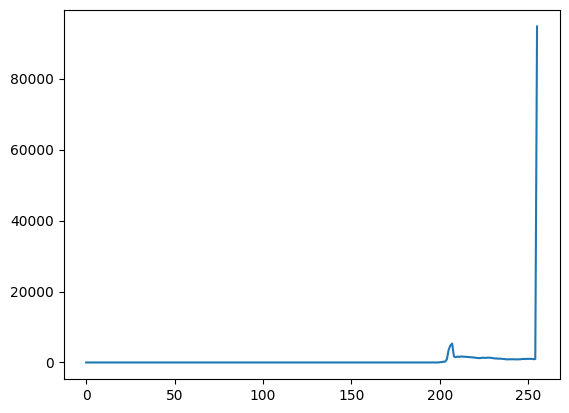

In [51]:
hist = cv2.calcHist([adjusted], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

## Geometrical transformation 

inverse transformation with of the rotation and translation matrix, then interpolation for pixel values with the computed one. 

Interpolation methods :
- closest neighbor 
- bilinear interpolation : from four surroundings pixels 
- and others (
    https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121
    )

cv2 rotqtion code : 

cv2.ROTATE_90_CLOCKWISE

cv2.ROTATE_180

cv2.ROTATE_90_COUNTERCLOCKWISE

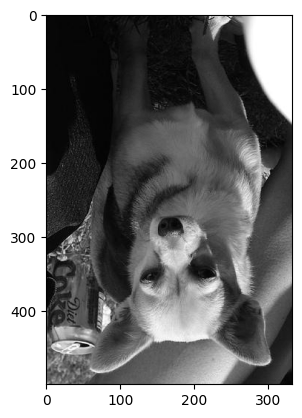

In [56]:
rotation = cv2.rotate(grayImg,  cv2.ROTATE_180)
plt.imshow(rotation, cmap="gray")
plt.show()

(333, 500)
(166.5, 250.0)


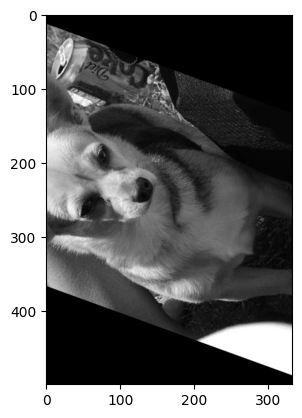

In [58]:
angle = 70 
dims = grayImg.shape[1::-1]
print(dims)
image_center = tuple(np.array(dims) / 2)
print(image_center)
rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
result = cv2.warpAffine(grayImg, rot_mat, dims, flags=cv2.INTER_LINEAR)
plt.imshow(result, cmap="gray")
plt.show()

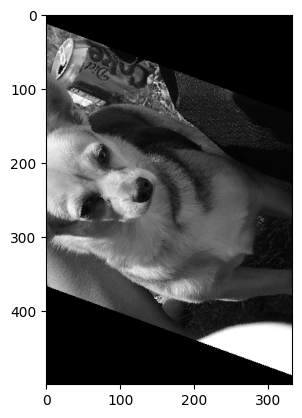

In [59]:
result = cv2.warpAffine(grayImg, rot_mat, dims, flags=cv2.INTER_NEAREST)
plt.imshow(result, cmap="gray")
plt.show()

### add additive noise

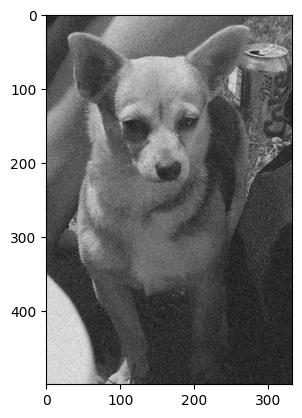

In [63]:
noise = np.random.normal(0, 15, grayImg.shape)




plt.imshow(grayImg + noise, cmap="gray")
plt.show()

## denoising : localised transformation  like averging = but blur image

can also be applied by a filter 

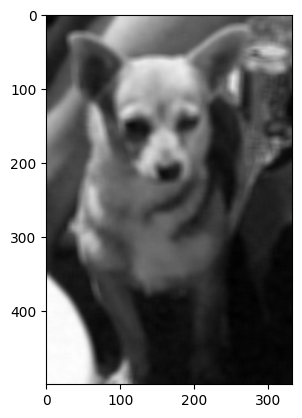

In [70]:
# Applying the filter
noisyImage = grayImg + noise
Blur = cv2.blur(noisyImage, (10,10))

plt.imshow(Blur, cmap="gray")
plt.show()